
# Agglomerative clustering with different metrics

Demonstrates the effect of different metrics on the hierarchical clustering.

The example is engineered to show the effect of the choice of different
metrics. It is applied to waveforms, which can be seen as
high-dimensional vector. Indeed, the difference between metrics is
usually more pronounced in high dimension (in particular for euclidean
and cityblock).

We generate data from three groups of waveforms. Two of the waveforms
(waveform 1 and waveform 2) are proportional one to the other. The cosine
distance is invariant to a scaling of the data, as a result, it cannot
distinguish these two waveforms. Thus even with no noise, clustering
using this distance will not separate out waveform 1 and 2.

We add observation noise to these waveforms. We generate very sparse
noise: only 6% of the time points contain noise. As a result, the
l1 norm of this noise (ie "cityblock" distance) is much smaller than it's
l2 norm ("euclidean" distance). This can be seen on the inter-class
distance matrices: the values on the diagonal, that characterize the
spread of the class, are much bigger for the Euclidean distance than for
the cityblock distance.

When we apply clustering to the data, we find that the clustering
reflects what was in the distance matrices. Indeed, for the Euclidean
distance, the classes are ill-separated because of the noise, and thus
the clustering does not separate the waveforms. For the cityblock
distance, the separation is good and the waveform classes are recovered.
Finally, the cosine distance does not separate at all waveform 1 and 2,
thus the clustering puts them in the same cluster.


In [13]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.patheffects as PathEffects
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)



In [14]:

def sqr(x):
    return np.sign(np.cos(x))


Text(0.5, 1, 'Ground truth')

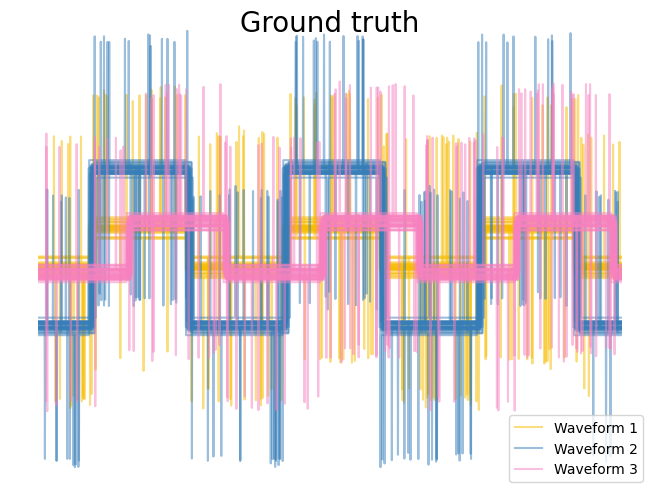

In [15]:


X = list()
y = list()
for i, (phi, a) in enumerate([(0.5, 0.15), (0.5, 0.6), (0.3, 0.2)]):
    for _ in range(30): ### 30 samples by each cluster
        phase_noise = 0.01 * np.random.normal()
        amplitude_noise = 0.04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < 0.997] = 0

        X.append(
            12
            * (
                (a + amplitude_noise) * (sqr(6 * (t + phi + phase_noise)))
                + additional_noise
            )
        )
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ("Waveform 1", "Waveform 2", "Waveform 3")

colors = ["#f7bd01", "#377eb8", "#f781bf"]

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, color, n in zip(range(n_clusters), colors, labels):
    lines = plt.plot(X[y == l].T, c=color, alpha=0.5)
    lines[0].set_label(n)

plt.legend(loc="best")

plt.axis("tight")
plt.axis("off")
plt.suptitle("Ground truth", size=20, y=1)



In [21]:
import pandas as pd

In [23]:
pd.DataFrame(pairwise_distances(X[y == i], X[y == j], metric="cosine"))
### n_samples by n_samples pairwise distance beteach each element of each cluster

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.131521,0.113044,0.129781,0.108611,1.293082e-01,0.089705,2.279284e-01,1.353165e-01,0.177881,...,1.371377e-01,0.103945,1.207534e-01,8.543284e-02,1.973073e-01,0.168642,0.141431,0.197173,0.107457,0.157675
1,0.131521,0.000000,0.039012,0.056611,0.040847,8.199512e-02,0.100920,1.529356e-01,6.328751e-02,0.105093,...,1.282154e-01,0.089112,5.953680e-02,8.922388e-02,1.235729e-01,0.097534,0.068265,0.125843,0.085119,0.086604
2,0.113044,0.039012,0.000000,0.034216,0.019999,6.204356e-02,0.081708,1.330666e-01,4.099700e-02,0.084144,...,1.094286e-01,0.069525,3.907090e-02,6.972929e-02,1.028116e-01,0.076208,0.046226,0.105401,0.065473,0.064941
3,0.129781,0.056611,0.034216,0.000000,0.038005,7.928022e-02,0.098946,1.475810e-01,5.858431e-02,0.099526,...,1.259709e-01,0.086856,5.670083e-02,8.715491e-02,1.176008e-01,0.091495,0.061984,0.120448,0.082908,0.080325
4,0.108611,0.040847,0.019999,0.038005,0.000000,5.772638e-02,0.077192,1.365558e-01,4.473892e-02,0.087846,...,1.051883e-01,0.065057,3.467110e-02,6.518326e-02,1.063473e-01,0.079868,0.049996,0.109024,0.060963,0.068617
5,0.129308,0.081995,0.062044,0.079280,0.057726,1.454392e-14,0.098822,1.736194e-01,8.572147e-02,0.127003,...,1.265521e-01,0.087274,7.104760e-02,8.717651e-02,1.446933e-01,0.119354,0.090762,0.147274,0.083212,0.108580
6,0.089705,0.100920,0.081708,0.098946,0.077192,9.882227e-02,0.000000,1.999871e-01,1.047927e-01,0.148127,...,1.071118e-01,0.072639,8.985819e-02,5.356550e-02,1.687095e-01,0.138979,0.110843,0.168074,0.076151,0.127787
7,0.227928,0.152936,0.133067,0.147581,0.136556,1.736194e-01,0.199987,1.343370e-14,1.548440e-01,0.093973,...,2.228629e-01,0.188387,1.531935e-01,1.892843e-01,1.812693e-01,0.125357,0.118819,0.119717,0.185062,0.166050
8,0.135317,0.063288,0.040997,0.058584,0.044739,8.572147e-02,0.104793,1.548440e-01,1.521006e-14,0.107133,...,1.318629e-01,0.092952,6.333649e-02,9.312452e-02,1.254312e-01,0.099478,0.070259,0.127848,0.088994,0.088526
9,0.177881,0.105093,0.084144,0.099526,0.087846,1.270035e-01,0.148127,9.397294e-02,1.071332e-01,0.000000,...,1.621752e-01,0.135772,1.053967e-01,1.367291e-01,1.349424e-01,0.090699,0.068912,0.069739,0.132232,0.118989


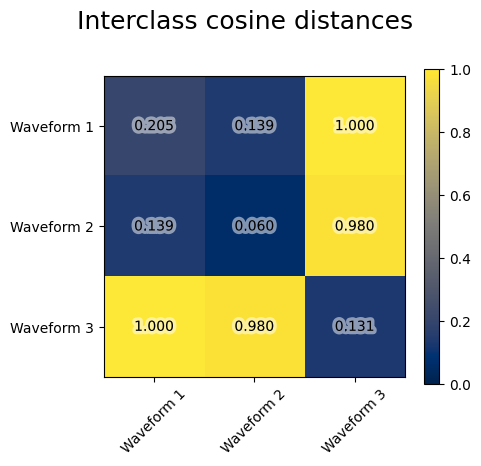

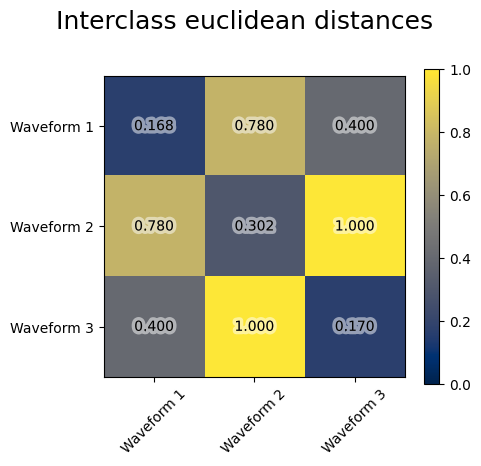

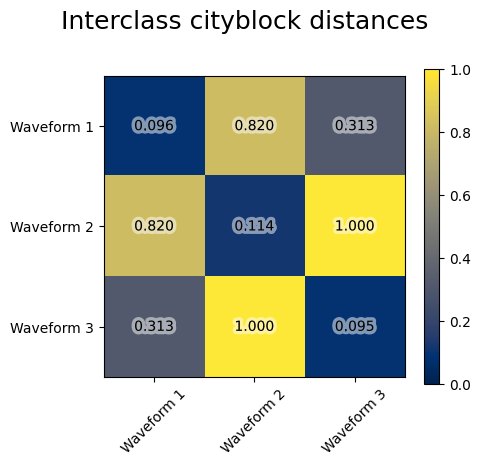

In [24]:

# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(
                X[y == i], X[y == j], metric=metric
            ).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            t = plt.text(
                i,
                j,
                "%5.3f" % avg_dist[i, j],
                verticalalignment="center",
                horizontalalignment="center",
            )
            t.set_path_effects(
                [PathEffects.withStroke(linewidth=5, foreground="w", alpha=0.5)]
            )

    plt.imshow(avg_dist, interpolation="nearest", cmap="cividis", vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18, y=1)
    plt.tight_layout()


on voit bien que les meilleurs résultats sont sur la cityblock distance ici, ce quid onnera surement des meilleurs résultats pour le clustering

### Math Behind Agglomerative Clustering

1. **Initialization**: Each data point is treated as a single cluster.
2. **Merge Step**:
   - Compute the distance between each pair of clusters.
   - Merge the pair of clusters with the smallest distance.
3. **Distance Computation**:
   - **Single Linkage**: $d(A, B) = \min \{d(a, b) : a \in A, b \in B\}$
   - **Complete Linkage**: $d(A, B) = \max \{d(a, b) : a \in A, b \in B\}$
   - **Average Linkage**: $d(A, B) = \frac{1}{|A||B|} \sum_{a \in A} \sum_{b \in B} d(a, b)$
   - **Ward's Method**: Minimizes the variance of the clusters being merged.

### Main Arguments in `sklearn`'s Agglomerative Clustering

- `n_clusters`: The number of clusters to find.
- `affinity`: Metric used to compute the linkage. Default is "euclidean".
- `memory`: Used to cache the tree computation. By default, no caching is done.
- `connectivity`: Connectivity matrix. Defines the neighboring samples following a given structure.
- `compute_full_tree`: Stop early the construction of the tree at `n_clusters`. Default is "auto".
- `linkage`: Which linkage criterion to use. Options are "ward", "complete", "average", and "single".
- `distance_threshold`: The linkage distance threshold above which, clusters will not be merged. If not None, `n_clusters` must be None and `compute_full_tree` must be True.

### Interpretation

- **Linkage Criterion**: Determines how the distance between clusters is calculated.
- **Affinity**: Defines the distance metric to use.
- **Connectivity**: Can enforce a certain structure in the clustering, such as nearest neighbors.
- **Number of Clusters**: Determines the stopping criterion for merging clusters.


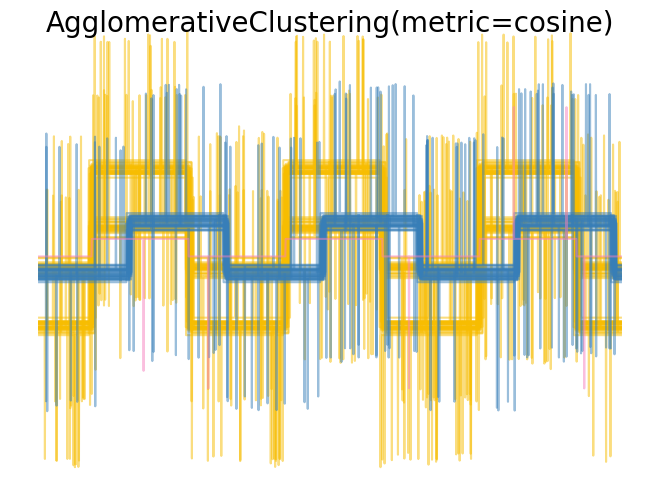

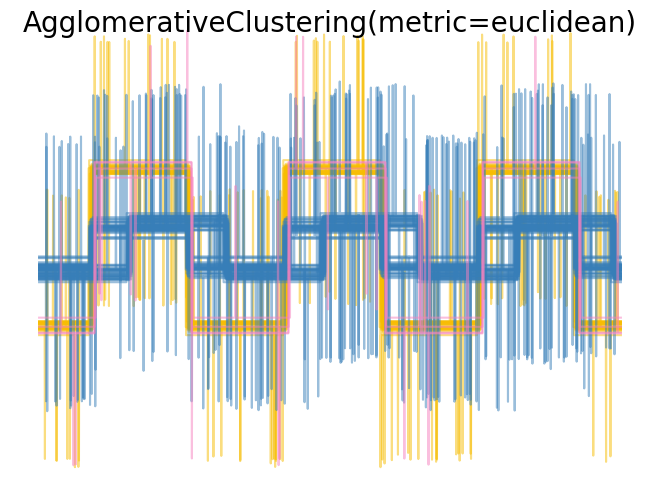

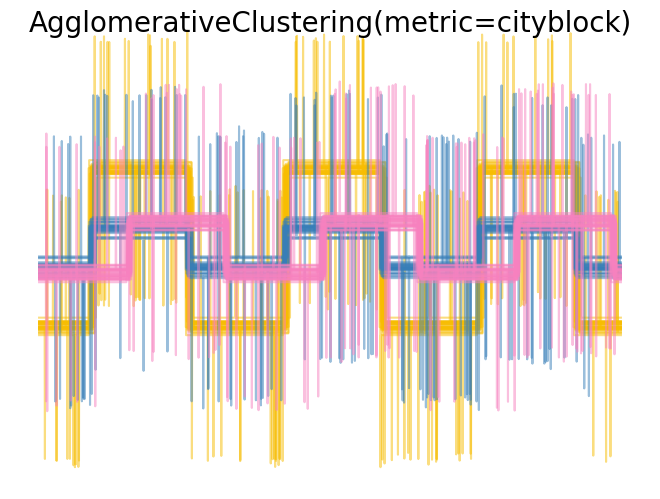

In [25]:


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(
        n_clusters=n_clusters, linkage="average", metric=metric
    )
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, color in zip(np.arange(model.n_clusters), colors):
        plt.plot(X[model.labels_ == l].T, c=color, alpha=0.5)
    plt.axis("tight")
    plt.axis("off")
    plt.suptitle("AgglomerativeClustering(metric=%s)" % metric, size=20, y=1)


plt.show()